In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import matplotlib.image as pltimg
import graphviz 
import pickle

############################
from sklearn import preprocessing, metrics
from sklearn.ensemble import RandomForestRegressor,VotingClassifier,RandomForestClassifier
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_predict, KFold, train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.externals import joblib
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error,r2_score
from sklearn.tree._export import plot_tree

In [2]:
df_Nacional = pd.read_csv('../microdadosEnem_Nacional_Amostragem.csv', sep = ';', encoding='ISO 8859-1')
df_Nacional = df_Nacional.loc[:, ~df_Nacional.columns.str.contains('^Unnamed')]
df_Alagoas = pd.read_csv('../microdadosEnemAlagoas.csv', sep = ';', encoding='ISO 8859-1')
df_Alagoas = df_Alagoas.loc[:, ~df_Alagoas.columns.str.contains('^Unnamed')]

In [3]:
# feature-cols vai armazenar todas as colunas exceto a coluna que armazena as
# notas de matemática do participante de Alagoas
feature_cols = [x for x in df_Alagoas.columns if x != 'NU_NOTA_MT']
X = df_Alagoas[feature_cols]
Y = df_Alagoas['NU_NOTA_MT']
X2= df_Nacional[feature_cols]
Y2 = df_Nacional['NU_NOTA_MT']


In [14]:
# Leitura dos datasets de treino e teste e criação do df de resposta
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split( X2, Y2, test_size=0.3, random_state=0)
#test-size = 0.3 define que o tamanho da base de teste é de 30% da base principal, e a base de treino é 70%

#visualizando os tamanhos da bases, teino e teste
print(X.shape, Y.shape, X_train.shape, y_train.shape ,X_test.shape, y_test.shape)

(64605, 40) (64605,) (45223, 40) (45223,) (19382, 40) (19382,)


In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = ['NU_IDADE', 'TP_SEXO','TP_ESTADO_CIVIL', 'TP_COR_RACA','TP_ANO_CONCLUIU', 'TP_ESCOLA',
                    'IN_TREINEIRO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO',  'Q005']
categorical_features = ['Q001', 'Q002', 'Q003', 'Q004','Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011','Q012', 'Q013', 'Q014',
                        'Q015','Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026', 'Q027']

numeric_transformer = Pipeline(   steps=[ ('scaler', StandardScaler())])

In [4]:


categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

X_train = X_train[numeric_features + categorical_features]
X_test = X_test[numeric_features + categorical_features]
X2_train = X2_train[numeric_features + categorical_features]
X2_test = X2_test[numeric_features + categorical_features]

preprocessing = ColumnTransformer(transformers=[
                                        ('num', numeric_transformer, numeric_features),                                       
                                        ('cat', categorical_transformer, categorical_features),  
])

NameError: name 'X_train' is not defined

In [6]:
feature_names= numeric_features + categorical_features
len(feature_names)
print(feature_names)

['NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'Q005', 'Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026', 'Q027']


In [15]:
rf    = pickle.load(open('RandomForest_AL.sav', 'rb'))
rf2    = pickle.load(open('RandomForest_BR.sav', 'rb'))

dtree = pickle.load(open('ArvoreDeDecisão_AL.sav', 'rb'))
dtree2 = pickle.load(open('ArvoreDeDecisão_BR.sav', 'rb'))

In [ ]:
Q002_A
Q001_H
Q002_B
Q002_C
Q001_A
Q001_B
Q002_D
Q001_E
Q001_D
Q026_A
Q006_H

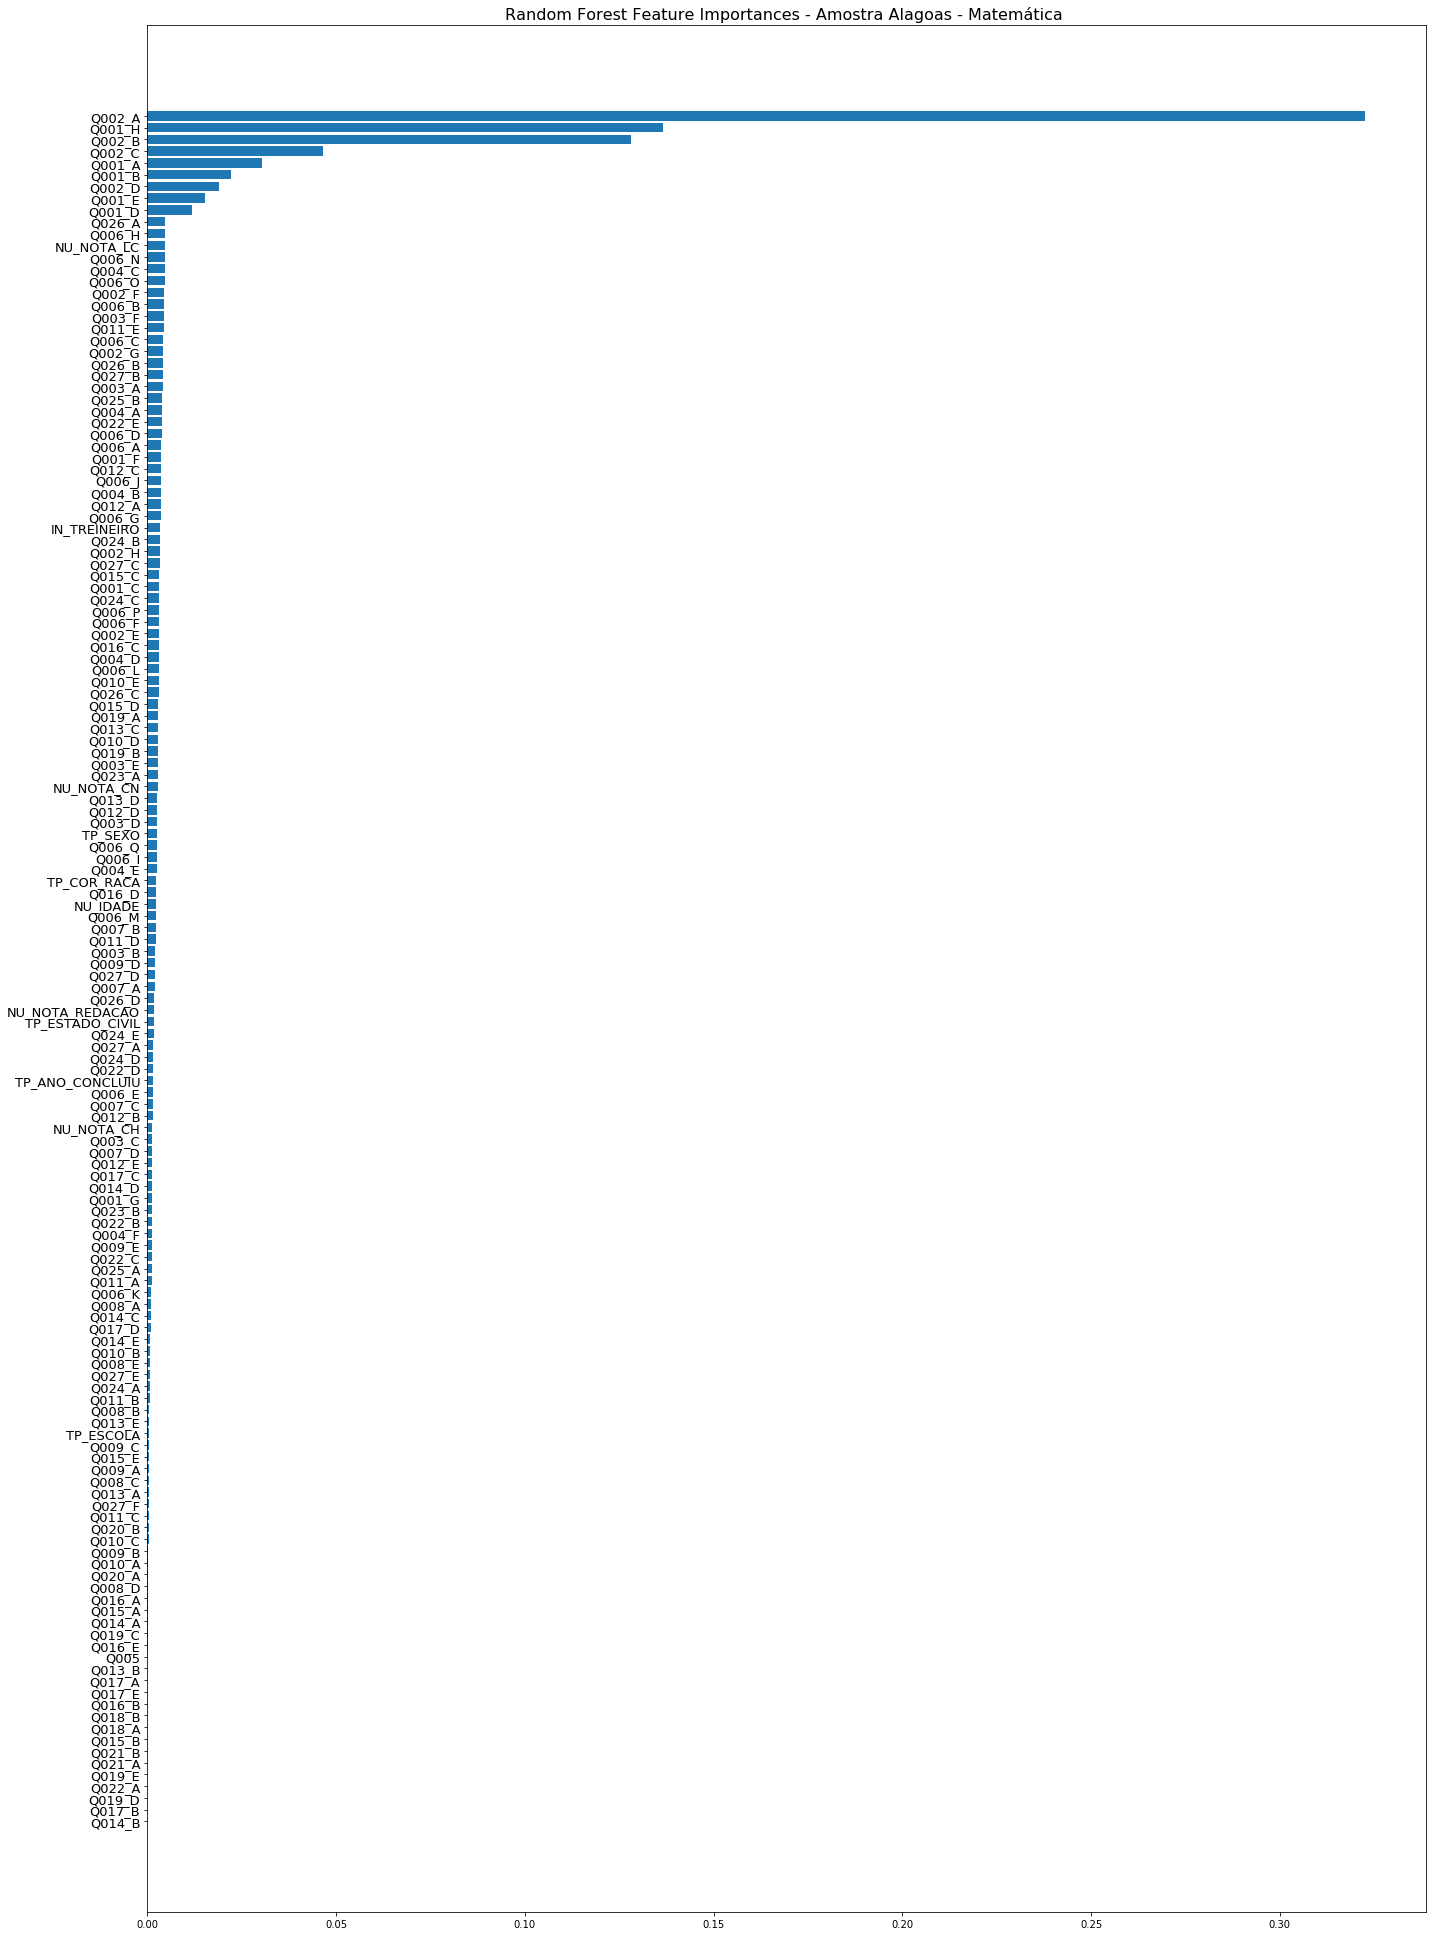

In [39]:
ohe = (rf.named_steps['preprocess']
         .named_transformers_['cat']
         .named_steps['onehot'])
feature_names = ohe.get_feature_names(input_features=categorical_features)
feature_names = np.r_[feature_names, numeric_features]

tree_feature_importances = (rf.named_steps['regressor'].feature_importances_)

sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(20, 27))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx], fontsize = 13)
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances - Amostra Alagoas - Matemática ", fontsize = 16)
fig.tight_layout()
plt.savefig('imagens/featuresImportancesRF_AL_MT.png', format='png')
plt.show()

In [ ]:
Q002_A : 
Q001_H
Q002_B
Q002_C
Q001_A
Q001_B
Q002_D
Q001_E
Q001_D
Q026_A
Q006_H

Q002:
A
B
C
D

Q001
A
B
E
H

Q006:
N
H

Q003:
A

Q025:
B


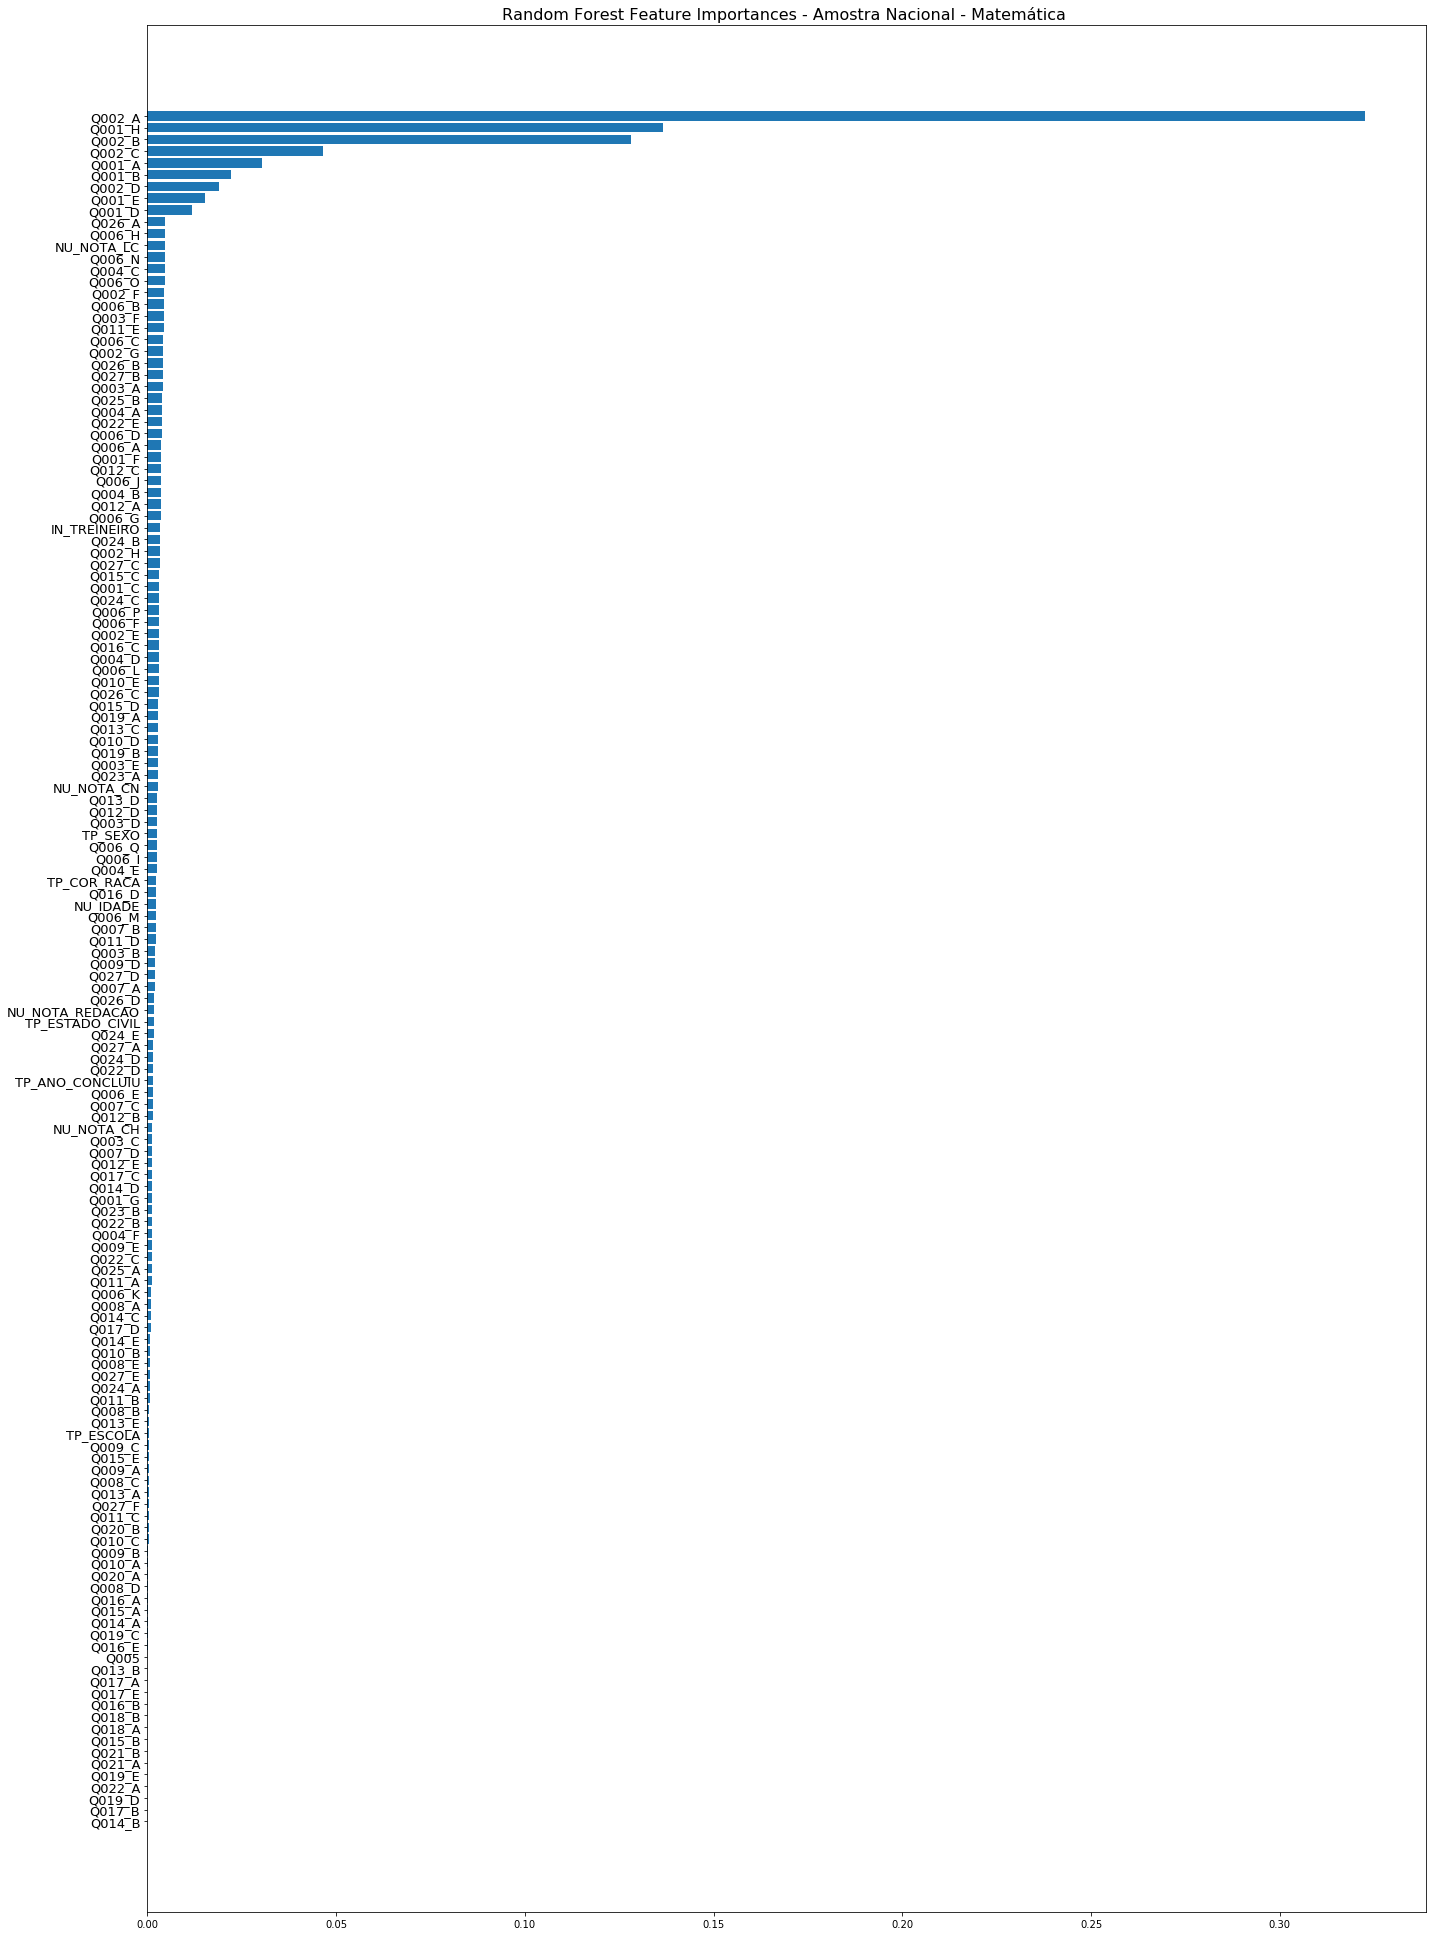

In [37]:
ohe = (rf2.named_steps['preprocess']
         .named_transformers_['cat']
         .named_steps['onehot'])
feature_names = ohe.get_feature_names(input_features=categorical_features)
feature_names = np.r_[feature_names, numeric_features]

tree_feature_importances = (rf2.named_steps['regressor'].feature_importances_)

sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(20, 27))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx], fontsize = 13)
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances - Amostra Nacional - Matemática ", fontsize = 16)
fig.tight_layout()
plt.savefig('imagens/featuresImportancesRF_BR_MT.png', format='png')
plt.show()

In [ ]:
Q002_A
Q001_H
Q002_B
Q002_C
Q001_A
Q001_B
Q002_D
Q001_E
Q006_N
Q003_A
Q025_B
Q006_H


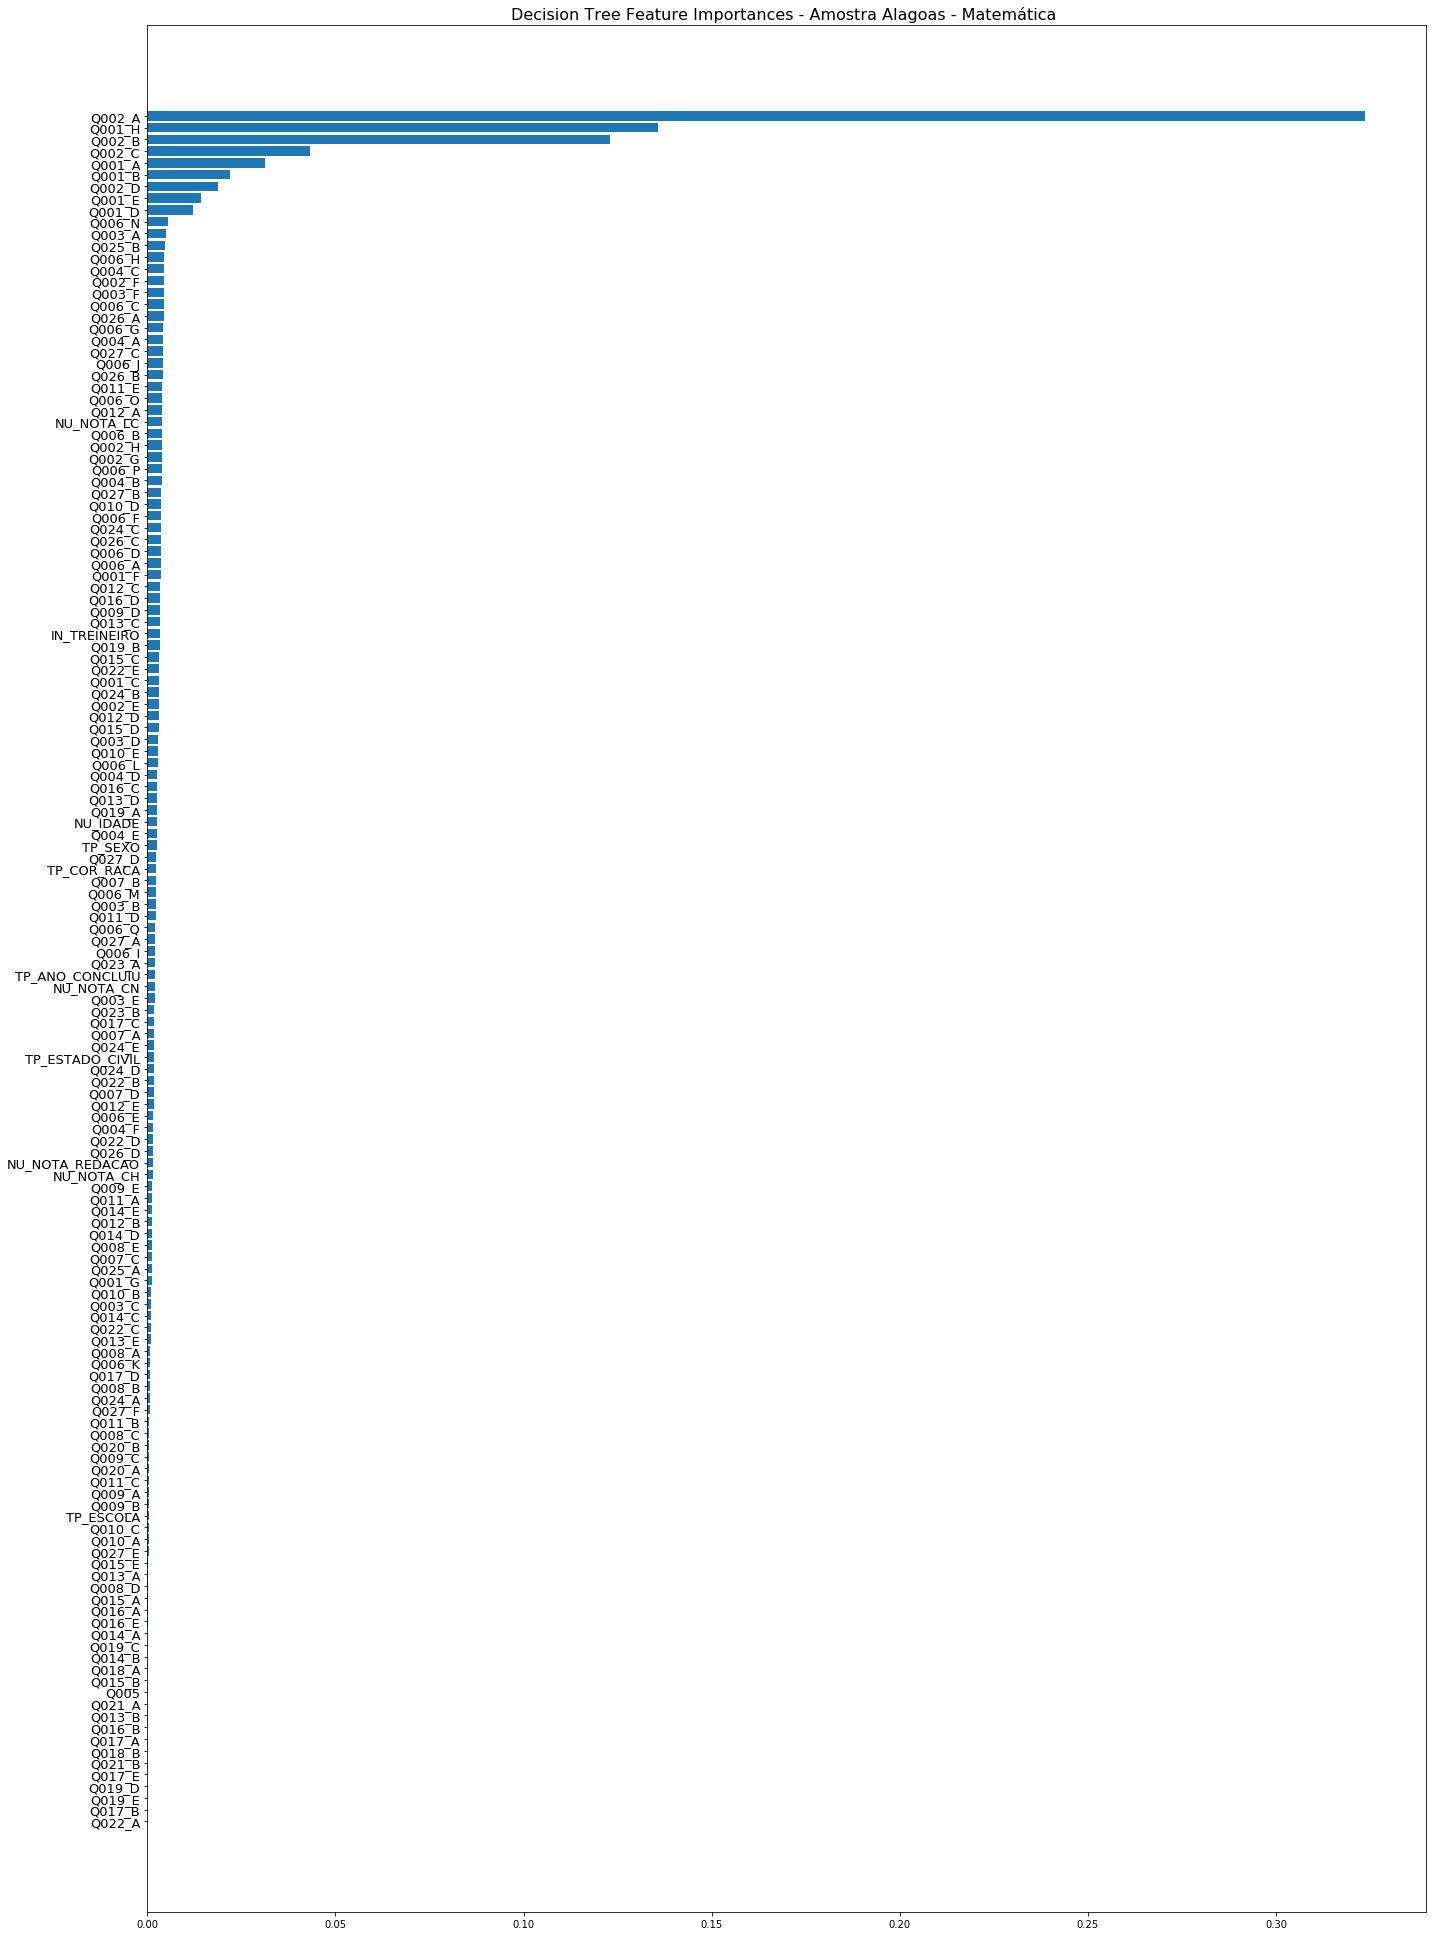

In [57]:
ohe = (dtree.named_steps['preprocess']
         .named_transformers_['cat']
         .named_steps['onehot'])
feature_names = ohe.get_feature_names(input_features=categorical_features)
feature_names = np.r_[feature_names, numeric_features]

tree_feature_importances = (dtree.named_steps['regressor'].feature_importances_)

sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(20, 27))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx], fontsize = 13)
ax.set_yticks(y_ticks)
ax.set_title("Decision Tree Feature Importances - Amostra Alagoas - Matemática ", fontsize = 16)
fig.tight_layout()
plt.savefig('imagens/featuresImportancesDT_AL_MT.png', format='png')
plt.show()

In [ ]:
Q002_A
Q001_H
Q002_B
Q002_C
Q001_A
Q001_B
Q002_D
Q001_E
Q006_N
Q003_A
Q025_B
Q006_H


Os resultados das importâncias das features para o modelo Árvore de decisão foram iguais, tanto para base nacional quanto para base de alagoas, as 10 features mais importantes foram classficadas nas mesmas posições e com as mesma porcetagens.
Para esse modelo as features que tiveram maior importância foram as que tratavam da seguinte pergunta:

Q001:
Alternativas:
A:
B:
C:
D:
E:

Q002:
A
B
C
D

Q006:
N:
H:

Q003:
A:

Q025:
B


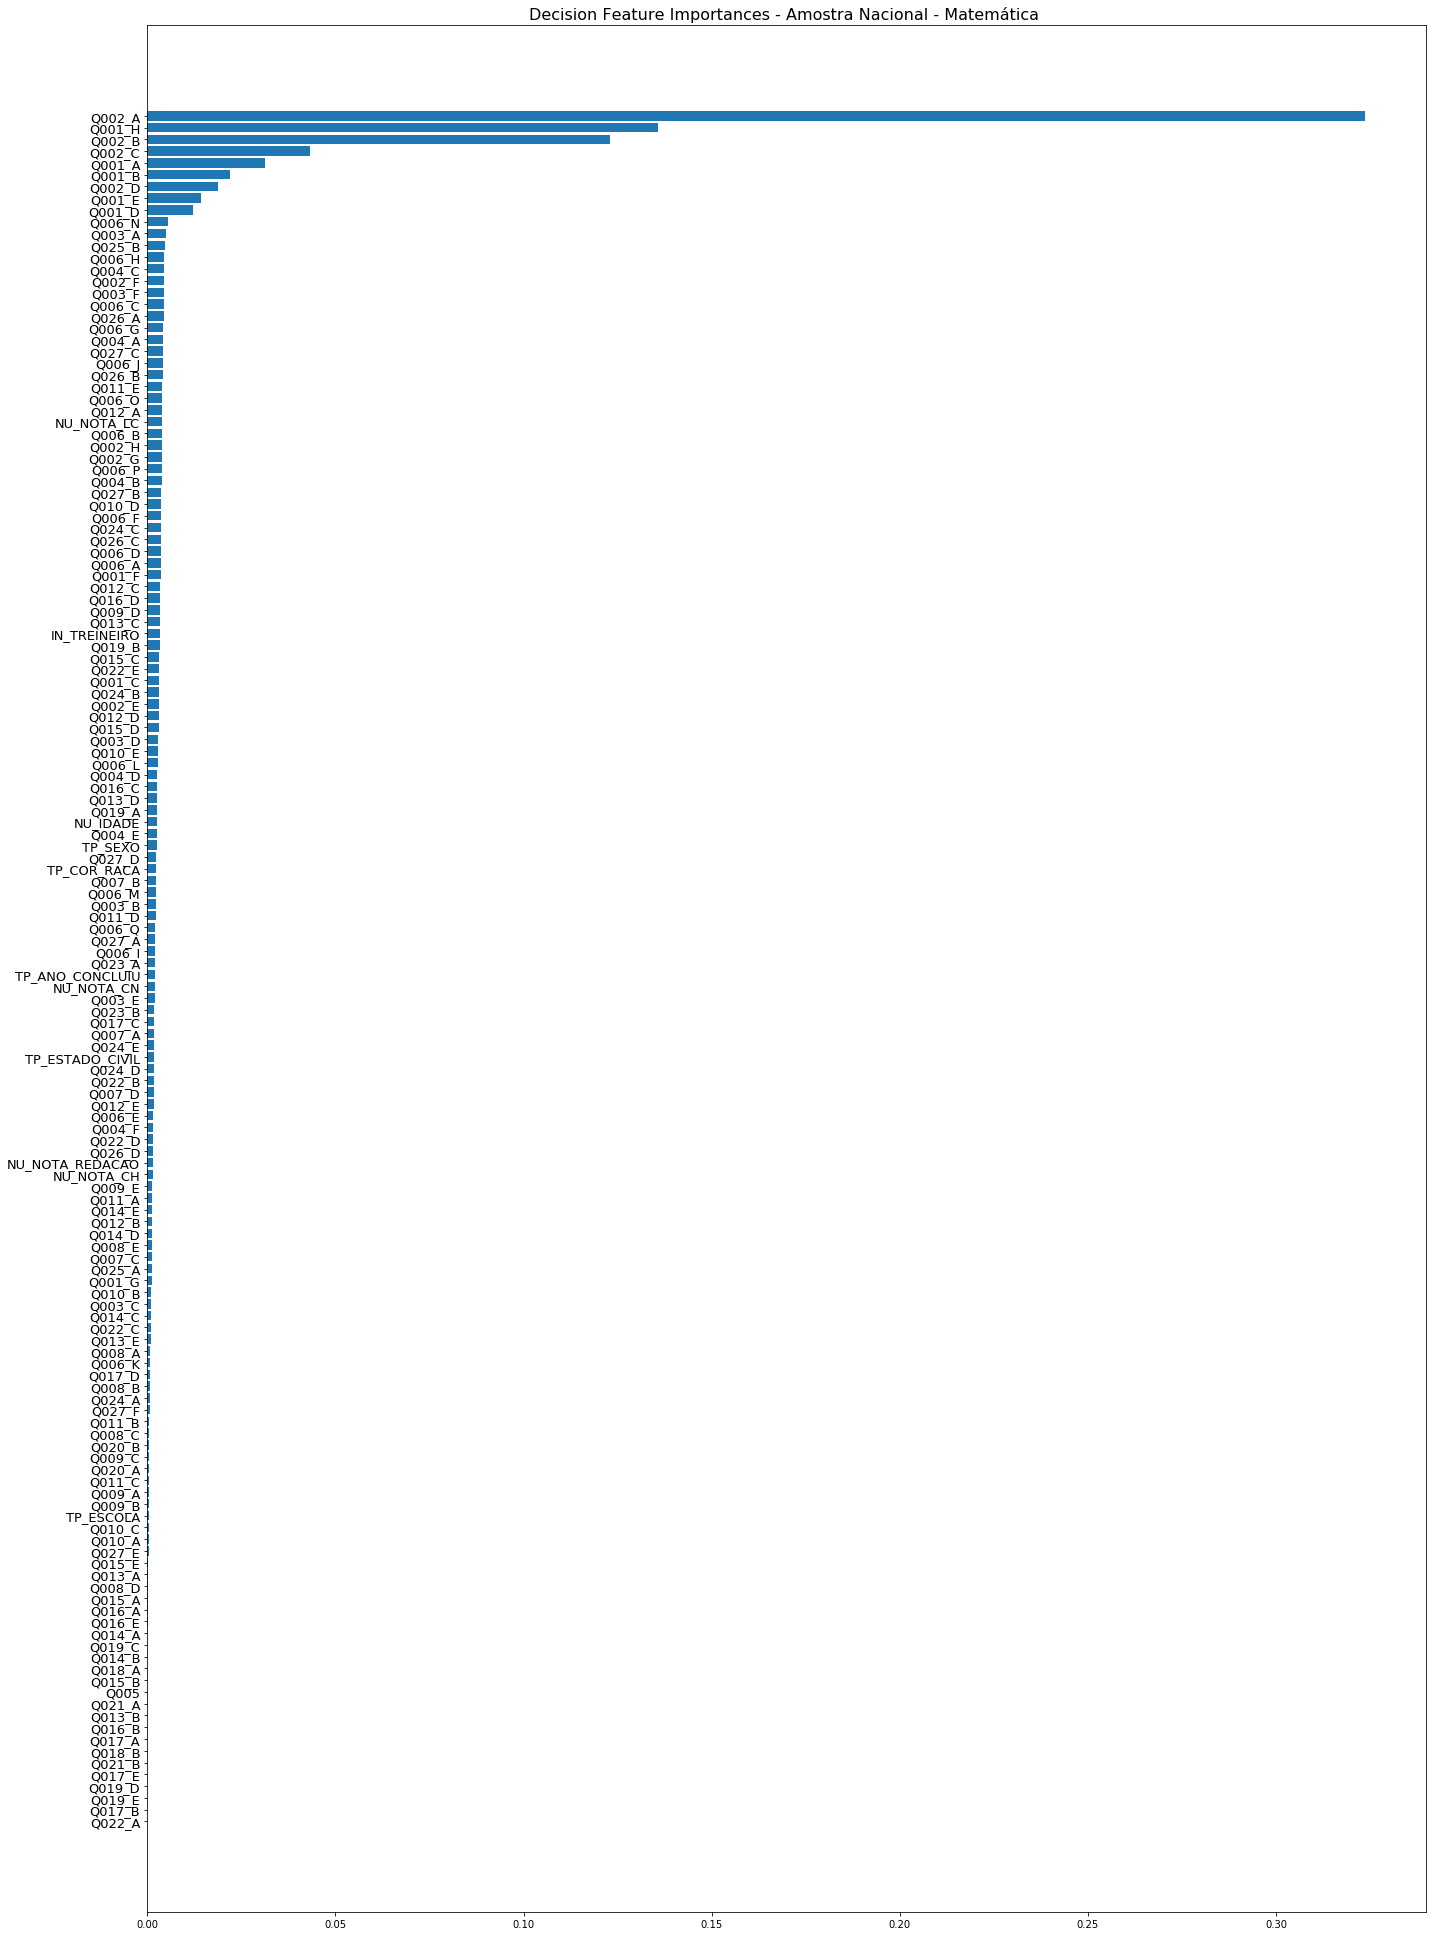

In [58]:
ohe = (dtree2.named_steps['preprocess']
         .named_transformers_['cat']
         .named_steps['onehot'])
feature_names = ohe.get_feature_names(input_features=categorical_features)
feature_names = np.r_[feature_names, numeric_features]

tree_feature_importances = (dtree2.named_steps['regressor'].feature_importances_)

sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(20, 27))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx], fontsize = 13)
ax.set_yticks(y_ticks)
ax.set_title("Decision Feature Importances - Amostra Nacional - Matemática ", fontsize = 16)
fig.tight_layout()
plt.savefig('imagens/featuresImportancesDT_BR_MT.png', format='png')
plt.show()

In [16]:
df_RF = pd.DataFrame()
df_DT = pd.DataFrame()

In [19]:

ohe = (rf.named_steps['preprocess']
         .named_transformers_['cat']
         .named_steps['onehot'])
feature_names = ohe.get_feature_names(input_features=categorical_features)
feature_names = np.r_[feature_names, numeric_features]

tree_feature_importances = (rf.named_steps['regressor'].feature_importances_)
tree_feature_importances2 = (rf2.named_steps['regressor'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()
sorted_idx2 = tree_feature_importances2.argsort()

features_importance = zip(tree_feature_importances, feature_names)
features_importance2 = zip(tree_feature_importances2, feature_names)


print()
labels = []
importances = []
l2 = []
i=[]
for importance, feature, in sorted(features_importance, reverse=True):
    
    x = round(importance*100, 2)
    labels.append(feature)
    importances.append(x)    
    print("%s: %f%%" % (feature, importance*100)) 
for importance, feature, in sorted(features_importance2, reverse=True):
    
    x = round(importance*100, 2)
    l2.append(feature)
    i.append(x)    
    print("%s: %f%%" % (feature, importance*100)) 
    

df_RF['importances RF AL'] = importances
df_RF['features'] = labels
df_RF['importances RF NA'] = i
df_RF['features'] = l2


print(importances)


Q002_A: 32.250137%
Q001_H: 13.654667%
Q002_B: 12.810070%
Q002_C: 4.650045%
Q001_A: 3.032966%
Q001_B: 2.226458%
Q002_D: 1.906226%
Q001_E: 1.515700%
Q001_D: 1.175537%
Q026_A: 0.479403%
Q006_H: 0.479238%
NU_NOTA_LC: 0.476733%
Q006_N: 0.473867%
Q004_C: 0.465314%
Q006_O: 0.464333%
Q002_F: 0.452279%
Q006_B: 0.449188%
Q003_F: 0.445014%
Q011_E: 0.428966%
Q006_C: 0.421206%
Q002_G: 0.419505%
Q026_B: 0.411525%
Q027_B: 0.404151%
Q003_A: 0.403330%
Q025_B: 0.388576%
Q004_A: 0.385214%
Q022_E: 0.380185%
Q006_D: 0.378373%
Q006_A: 0.372048%
Q001_F: 0.369369%
Q012_C: 0.364448%
Q006_J: 0.364350%
Q004_B: 0.358528%
Q012_A: 0.352243%
Q006_G: 0.350929%
IN_TREINEIRO: 0.343461%
Q024_B: 0.341261%
Q002_H: 0.333478%
Q027_C: 0.324181%
Q015_C: 0.322824%
Q001_C: 0.320990%
Q024_C: 0.320702%
Q006_P: 0.316099%
Q006_F: 0.315374%
Q002_E: 0.309685%
Q016_C: 0.303652%
Q004_D: 0.303635%
Q006_L: 0.302231%
Q010_E: 0.301891%
Q026_C: 0.298958%
Q015_D: 0.296403%
Q019_A: 0.293760%
Q013_C: 0.292363%
Q010_D: 0.284609%
Q019_B: 0.2793

In [17]:

ohe = (dtree.named_steps['preprocess']
         .named_transformers_['cat']
         .named_steps['onehot'])
feature_names = ohe.get_feature_names(input_features=categorical_features)
feature_names = np.r_[feature_names, numeric_features]

tree_feature_importances = (dtree.named_steps['regressor'].feature_importances_)
tree_feature_importances2 = (dtree2.named_steps['regressor'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()
sorted_idx2 = tree_feature_importances2.argsort()

features_importance = zip(tree_feature_importances, feature_names)
features_importance2 = zip(tree_feature_importances2, feature_names)


print()
labels = []
importances = []
l2 = []
i=[]
for importance, feature, in sorted(features_importance, reverse=True):
    
    x = round(importance*100, 2)
    labels.append(feature)
    importances.append(x)    
    print("%s: %f%%" % (feature, importance*100)) 
for importance, feature, in sorted(features_importance2, reverse=True):
    
    x = round(importance*100, 2)
    l2.append(feature)
    i.append(x)    
    print("%s: %f%%" % (feature, importance*100)) 
    

df_DT['importances RF AL'] = importances
df_DT['features'] = labels
df_DT['importances RF NA'] = i
df_DT['features'] = l2


print(importances)


Q002_A: 32.355838%
Q001_H: 13.582338%
Q002_B: 12.302095%
Q002_C: 4.318153%
Q001_A: 3.127673%
Q001_B: 2.201698%
Q002_D: 1.871650%
Q001_E: 1.417812%
Q001_D: 1.203921%
Q006_N: 0.537455%
Q003_A: 0.488158%
Q025_B: 0.459718%
Q006_H: 0.454963%
Q004_C: 0.453506%
Q002_F: 0.452446%
Q003_F: 0.445501%
Q006_C: 0.439890%
Q026_A: 0.436991%
Q006_G: 0.425037%
Q004_A: 0.422962%
Q027_C: 0.419835%
Q006_J: 0.414354%
Q026_B: 0.404430%
Q011_E: 0.403243%
Q006_O: 0.402931%
Q012_A: 0.402347%
NU_NOTA_LC: 0.400459%
Q006_B: 0.399480%
Q002_H: 0.389745%
Q002_G: 0.386140%
Q006_P: 0.384077%
Q004_B: 0.380778%
Q027_B: 0.370894%
Q010_D: 0.365618%
Q006_F: 0.364376%
Q024_C: 0.363681%
Q026_C: 0.360888%
Q006_D: 0.359218%
Q006_A: 0.357270%
Q001_F: 0.354412%
Q012_C: 0.344168%
Q016_D: 0.342202%
Q009_D: 0.336627%
Q013_C: 0.334289%
IN_TREINEIRO: 0.331764%
Q019_B: 0.328199%
Q015_C: 0.320794%
Q022_E: 0.306200%
Q001_C: 0.305265%
Q024_B: 0.303418%
Q002_E: 0.301638%
Q012_D: 0.300359%
Q015_D: 0.298784%
Q003_D: 0.296901%
Q010_E: 0.2968

In [98]:
df1 = pd.DataFrame()
df1 = df_RF.loc[(df_RF['importances RF AL'] <= 0.5)]

x1 = df1['importances RF AL'].sum()
x1

26.700000000000003

In [158]:
100-x1

73.3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000257ECBBB940>],
      dtype=object)

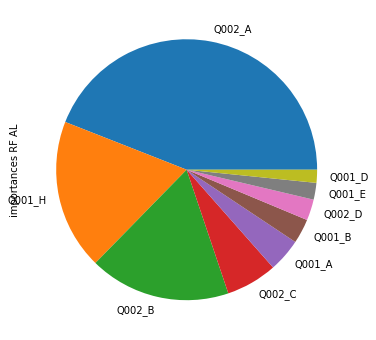

In [70]:
df_RF
df = pd.DataFrame()
df = df_RF.loc[(df_RF['importances RF AL'] >= 0.5)]
#df['importances RF AL'].plot.pie(subplots = True, autopct='%1.1f%%', colors = ["#20257c", "#424ad1", "#6a8ee8", "#66bbe2", "#66dee2", "#6ce2cb", "#6ad187", "#3b7f5b"],
        #labeldistance = 1.1,)
df['importances RF AL']
x = df['importances RF AL']
x.plot.pie(subplots=True,labels=df['features'], figsize=(6, 6),)

In [133]:
pip install palettable

Note: you may need to restart the kernel to use updated packages.


In [153]:
c=[plt.cm.Blues]
s = np.arange(0.1, 1, 0.1)
colors=[]
from palettable.colorbrewer.qualitative import Pastel1_7
from palettable.matplotlib import Magma_9, Inferno_9, Inferno_3
from palettable.cmocean.diverging import Balance_9, Delta_9
from palettable.cmocean.sequential import Balance_9, Delta_9
from palettable.colorbrewer.qualitative import Paired_9, Dark2_4,Set1_4
from palettable.scientific.diverging import Cork_9, Roma_9


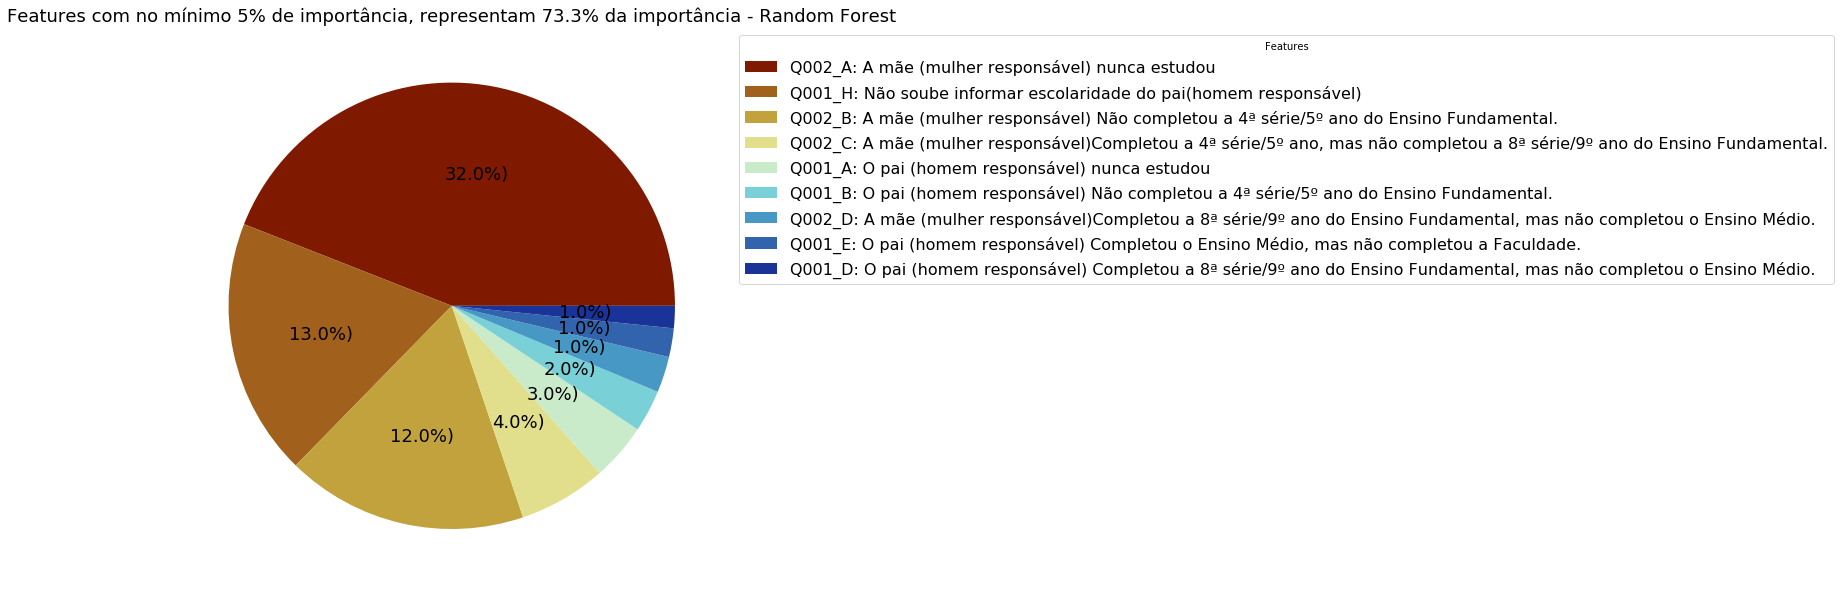

In [183]:
fig, ax = plt.subplots(figsize=(10, 12), subplot_kw=dict(aspect="equal"))

recipe = x
c=[plt.cm.Blues]
s = range(2, 10, 2)

data = x
#ingredients = df['features']
ingredients = ['Q002_A: A mãe (mulher responsável) nunca estudou' ,
               'Q001_H: Não soube informar escolaridade do pai(homem responsável)',
               'Q002_B: A mãe (mulher responsável) Não completou a 4ª série/5º ano do Ensino Fundamental.',
               'Q002_C: A mãe (mulher responsável)Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
               'Q001_A: O pai (homem responsável) nunca estudou',
               'Q001_B: O pai (homem responsável) Não completou a 4ª série/5º ano do Ensino Fundamental.',
               'Q002_D: A mãe (mulher responsável)Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
               'Q001_E: O pai (homem responsável) Completou o Ensino Médio, mas não completou a Faculdade.',
               'Q001_D: O pai (homem responsável) Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
               ]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%)".format(absolute, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="black"), colors= Roma_9.hex_colors)

ax.legend(wedges, ingredients,
          title="Features",loc="best", fontsize = 16,
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=18)

ax.set_title("Features com no mínimo 5% de importância, representam 73.3% da importância - Random Forest", fontsize = 18)
plt.savefig('imagens/pieFI_RF_BR.png', format='png')
plt.show()

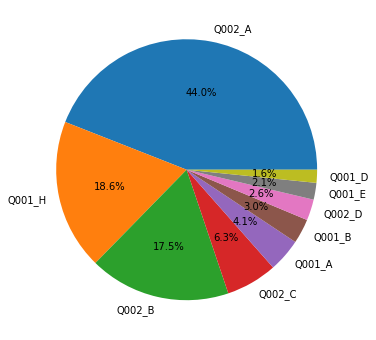

In [44]:

explode= [0.1, 0.1, 0.1, 0.1, 0,0,0,0,0]

fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(df['importances RF AL'], labels=df['features'], autopct='%1.1f%%')
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [7]:
df_RF["Questão"] = [s.split("_")[0] for s in df_RF.features]
df_RF["Alternativa"]=[s.split("_")[1] for s in df_RF.features]
s = "hello, world!"
s = "Q014_D"
print(s.split("_"))

['Q014', 'D']


In [29]:

ohe = (dtree.named_steps['preprocess']
         .named_transformers_['cat']
         .named_steps['onehot'])
feature_names = ohe.get_feature_names(input_features=categorical_features)
feature_names = np.r_[feature_names, numeric_features]

tree_feature_importances = (dtree.named_steps['regressor'].feature_importances_)

sorted_idx = tree_feature_importances.argsort()

features_importance = zip(tree_feature_importances, feature_names)

print()
labels = []
importances = []
for importance, feature, in sorted(features_importance, reverse=True):
    
    x = round(importance*100, 2)
    labels.append(feature)
    importances.append(x)    
    print("%s: %f%%" % (feature, importance*100))  

df_DT['importances DT'] = importances
df_DT['features'] = labels

print(importances, labels)

NameError: name 'dtree' is not defined

In [28]:
df.sample(100).plot.bar(stacked=True, figsize=(20,10));

NameError: name 'df' is not defined